## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  56.965049  1060.719989  0.661390  2.401545  703.981164
1  98.861324  1485.797614  0.665863  7.621793  994.165819
2  78.116620   579.879914  0.408836  5.132233  249.421567
3   1.744381  1161.422930  0.162612  4.994189  188.974988
4  67.309145   709.167211  0.102674  2.850040   99.099466


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0322373	total: 57.2ms	remaining: 57.1s
1:	learn: 1.0196728	total: 57.6ms	remaining: 28.7s
2:	learn: 1.0083891	total: 57.9ms	remaining: 19.3s
3:	learn: 0.9969795	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9823861	total: 58.8ms	remaining: 11.7s
5:	learn: 0.9691120	total: 59.2ms	remaining: 9.81s
6:	learn: 0.9564788	total: 59.8ms	remaining: 8.48s
7:	learn: 0.9422387	total: 60.4ms	remaining: 7.49s
8:	learn: 0.9299353	total: 60.8ms	remaining: 6.7s
9:	learn: 0.9158298	total: 61.2ms	remaining: 6.06s
10:	learn: 0.9041530	total: 61.7ms	remaining: 5.55s
11:	learn: 0.8892424	total: 62.1ms	remaining: 5.12s
12:	learn: 0.8760653	total: 62.5ms	remaining: 4.74s
13:	learn: 0.8630495	total: 63ms	remaining: 4.43s
14:	learn: 0.8507256	total: 63.4ms	remaining: 4.16s
15:	learn: 0.8398801	total: 63.8ms	remaining: 3.92s
16:	learn: 0.8281110	total: 64.3ms	remaining: 3.72s
17:	learn: 0.8168407	total: 64.7ms	remaining: 3.53s
18:	learn: 0.8085914	total: 65.2ms	remaining: 3

91:	learn: 0.3242839	total: 101ms	remaining: 994ms
92:	learn: 0.3209639	total: 101ms	remaining: 987ms
93:	learn: 0.3175381	total: 102ms	remaining: 980ms
94:	learn: 0.3133247	total: 102ms	remaining: 973ms
95:	learn: 0.3098951	total: 103ms	remaining: 966ms
96:	learn: 0.3060403	total: 103ms	remaining: 960ms
97:	learn: 0.3030538	total: 104ms	remaining: 953ms
98:	learn: 0.2987821	total: 104ms	remaining: 946ms
99:	learn: 0.2952360	total: 104ms	remaining: 938ms
100:	learn: 0.2915896	total: 105ms	remaining: 938ms
101:	learn: 0.2886568	total: 106ms	remaining: 932ms
102:	learn: 0.2853548	total: 106ms	remaining: 925ms
103:	learn: 0.2826028	total: 107ms	remaining: 920ms
104:	learn: 0.2788831	total: 107ms	remaining: 914ms
105:	learn: 0.2760519	total: 108ms	remaining: 909ms
106:	learn: 0.2732215	total: 108ms	remaining: 905ms
107:	learn: 0.2700259	total: 109ms	remaining: 899ms
108:	learn: 0.2672723	total: 109ms	remaining: 893ms
109:	learn: 0.2641896	total: 110ms	remaining: 888ms
110:	learn: 0.2611526

276:	learn: 0.0640318	total: 186ms	remaining: 487ms
277:	learn: 0.0635364	total: 187ms	remaining: 486ms
278:	learn: 0.0631104	total: 188ms	remaining: 485ms
279:	learn: 0.0627151	total: 188ms	remaining: 484ms
280:	learn: 0.0622919	total: 188ms	remaining: 482ms
281:	learn: 0.0619398	total: 189ms	remaining: 481ms
282:	learn: 0.0616589	total: 190ms	remaining: 480ms
283:	learn: 0.0612883	total: 190ms	remaining: 479ms
284:	learn: 0.0609017	total: 190ms	remaining: 478ms
285:	learn: 0.0605655	total: 191ms	remaining: 477ms
286:	learn: 0.0602459	total: 191ms	remaining: 475ms
287:	learn: 0.0598231	total: 192ms	remaining: 475ms
288:	learn: 0.0594545	total: 193ms	remaining: 474ms
289:	learn: 0.0591151	total: 193ms	remaining: 473ms
290:	learn: 0.0587787	total: 193ms	remaining: 471ms
291:	learn: 0.0584072	total: 194ms	remaining: 471ms
292:	learn: 0.0580733	total: 195ms	remaining: 470ms
293:	learn: 0.0577215	total: 195ms	remaining: 469ms
294:	learn: 0.0574011	total: 196ms	remaining: 468ms
295:	learn: 

482:	learn: 0.0241279	total: 283ms	remaining: 303ms
483:	learn: 0.0240224	total: 284ms	remaining: 303ms
484:	learn: 0.0239075	total: 284ms	remaining: 302ms
485:	learn: 0.0238703	total: 285ms	remaining: 301ms
486:	learn: 0.0237574	total: 285ms	remaining: 300ms
487:	learn: 0.0236550	total: 285ms	remaining: 299ms
488:	learn: 0.0236187	total: 286ms	remaining: 299ms
489:	learn: 0.0234955	total: 286ms	remaining: 298ms
490:	learn: 0.0233854	total: 286ms	remaining: 297ms
491:	learn: 0.0232718	total: 287ms	remaining: 296ms
492:	learn: 0.0231478	total: 288ms	remaining: 296ms
493:	learn: 0.0230928	total: 288ms	remaining: 295ms
494:	learn: 0.0230319	total: 288ms	remaining: 294ms
495:	learn: 0.0229296	total: 289ms	remaining: 293ms
496:	learn: 0.0228242	total: 289ms	remaining: 293ms
497:	learn: 0.0227051	total: 290ms	remaining: 292ms
498:	learn: 0.0226459	total: 290ms	remaining: 291ms
499:	learn: 0.0225467	total: 290ms	remaining: 290ms
500:	learn: 0.0224890	total: 291ms	remaining: 290ms
501:	learn: 

674:	learn: 0.0119849	total: 369ms	remaining: 178ms
675:	learn: 0.0119304	total: 370ms	remaining: 177ms
676:	learn: 0.0118774	total: 370ms	remaining: 177ms
677:	learn: 0.0118565	total: 371ms	remaining: 176ms
678:	learn: 0.0118056	total: 371ms	remaining: 175ms
679:	learn: 0.0117926	total: 372ms	remaining: 175ms
680:	learn: 0.0117799	total: 372ms	remaining: 174ms
681:	learn: 0.0117294	total: 372ms	remaining: 174ms
682:	learn: 0.0117089	total: 373ms	remaining: 173ms
683:	learn: 0.0116912	total: 373ms	remaining: 173ms
684:	learn: 0.0116623	total: 374ms	remaining: 172ms
685:	learn: 0.0116502	total: 374ms	remaining: 171ms
686:	learn: 0.0115924	total: 375ms	remaining: 171ms
687:	learn: 0.0115441	total: 375ms	remaining: 170ms
688:	learn: 0.0115321	total: 375ms	remaining: 169ms
689:	learn: 0.0114686	total: 376ms	remaining: 169ms
690:	learn: 0.0114260	total: 376ms	remaining: 168ms
691:	learn: 0.0113700	total: 377ms	remaining: 168ms
692:	learn: 0.0113084	total: 377ms	remaining: 167ms
693:	learn: 

887:	learn: 0.0070840	total: 466ms	remaining: 58.7ms
888:	learn: 0.0070735	total: 466ms	remaining: 58.2ms
889:	learn: 0.0070627	total: 467ms	remaining: 57.7ms
890:	learn: 0.0070424	total: 467ms	remaining: 57.1ms
891:	learn: 0.0070292	total: 467ms	remaining: 56.6ms
892:	learn: 0.0070163	total: 468ms	remaining: 56.1ms
893:	learn: 0.0070115	total: 468ms	remaining: 55.5ms
894:	learn: 0.0069916	total: 469ms	remaining: 55ms
895:	learn: 0.0069789	total: 469ms	remaining: 54.5ms
896:	learn: 0.0069500	total: 469ms	remaining: 53.9ms
897:	learn: 0.0069305	total: 470ms	remaining: 53.4ms
898:	learn: 0.0069001	total: 470ms	remaining: 52.8ms
899:	learn: 0.0068810	total: 471ms	remaining: 52.3ms
900:	learn: 0.0068534	total: 471ms	remaining: 51.8ms
901:	learn: 0.0068269	total: 472ms	remaining: 51.2ms
902:	learn: 0.0068152	total: 472ms	remaining: 50.7ms
903:	learn: 0.0068067	total: 472ms	remaining: 50.2ms
904:	learn: 0.0067982	total: 473ms	remaining: 49.6ms
905:	learn: 0.0067741	total: 473ms	remaining: 49

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


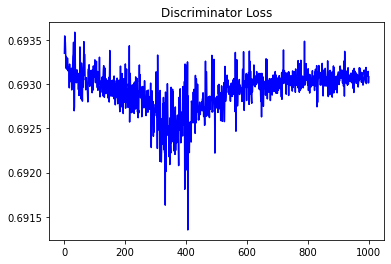

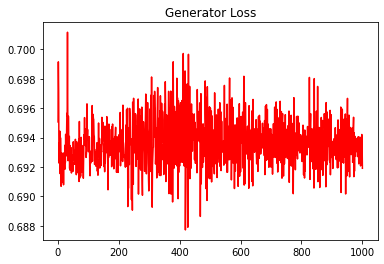

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007995446552384407


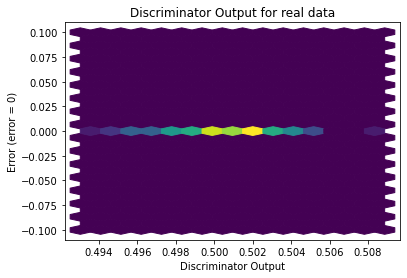

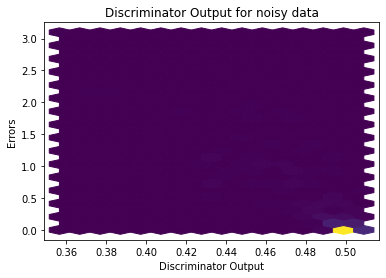

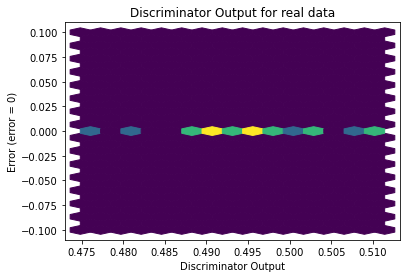

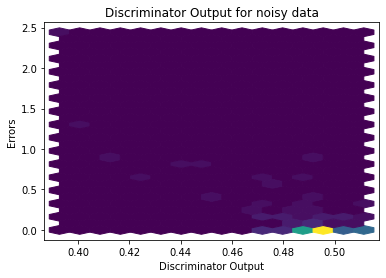

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1290]], requires_grad=True)
